# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


###
Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Francisco Maldonado
- Nombre de alumno 2:

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/FranMP999/)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.




### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**



1.
Los datos de entrenamiento se utilizan para que el modelo aprenda mientras que los de validación no se usan para aprender, sino para evaluar el desempeño del modelo durante la fase de entrenamiento para ajustar hiperparámetros o detectar overfitting.

3.
Aunque resulte redundante el mayor problema de la clasificación no supervisada es la ausencia de etiquetas con las cuales evaluar el desempeño del modelo, sin estas no hay un criterio estricto para el ajuste de parámetros o selección del modelo, dependiendo en última instancia del criterio experto para evaluar el desempeño, y quedando la interpretabilidad de los patrones encontrados al desempeño de algoritmos de reducción de dimensionalidad que permitan distinguir algo de valor visualmente.

4. La matriz de confusión es una tabla que ayuda a visualizar el desempeño de un algoritmo de clasificación,
cada fila representa las instancias de la clase real y cada columna las instancias de la clase predicha. Por ejemplo: $M_{i,j}=30$ quiere decir que hay 30 datos de la clase i que fueron predichos como pertenecientes a la clase j.

5. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy: El accuracy representa simplemente la tasa de observaciones bien clasificadas, es útil en datasets equilibrados o cuando se entiende poco del problema. $$\text{accuracy} = \frac{\text{número de predicciones correctas}}{\text{número de predicciones totales}} = \frac{TP + TN}{TP+TN+FP+FN}$$
  * Precision: La precisión representa cuantas de las observaciones clasificadas como positivos son realmente positivos. Mejora cuando disminuyen los falsos positivos. Lo optimizamos cuando queremos evitar los falsos positivos lo máximo posible, e.g: la mayoría de campañas de marketing. $$P = \frac{\text{Clasificados correctamente como positivo}}{\text{Todos los predichos como positivos}} =\frac{TP}{(TP + FP)}$$
  * Recall:  El recall representa cuantas de las observaciones que se debieron identificar como positivas lo fueron realmente. Mejora cuando disminuyen los falsos negativos. Lo optimizamos cuando queremos evitar los falsos negativos lo máximo posible, e.g: cuando clasificamos una enfermedad. $$R = \frac{\text{Clasificados correctamente como positivo}}{\text{Todos los que debería haber clasificado como positivos}}  = \frac{TP}{(TP+FN)}$$
  * F1 score: El F1 busca equilibrar precision y recall, al ser un promedio armónico disminuye si los valores de precision y recall son muy distintos.
 $$F = \frac{2PR}{(P+R)}$$
    

5.

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: No queremos clasificar como buenas maquinas defectuosas $\Rightarrow$ disminuir falsos negativos (clase positiva es falla) $\Rightarrow$ Recall.
  * Detección de enfermedades altamente contagiosas: No queremos clasificar como sanos a personas enfermas $\Rightarrow$ disminuir falsos negativos (clase positiva es enfermo) $\Rightarrow$ Recall.
  * Aprobación de créditos de alto riesgo: No queremos clasificar como buenos a clientes malos $\Rightarrow$ disminuir falsos positivos (clase positiva es cliente apto a crédito) $\Rightarrow$ Precision.
  * Detección de crímenes: No queremos clasificar como criminales a gente inocente $\Rightarrow$ disminuir falsos positivos (clase positiva es criminal) $\Rightarrow$ Precision.

6.
   La calibración de modelos corresponde al ajuste de las probabilidades entregadas por un modelo a las probabilidades reales de ocurrencia de las clases y no sólo a un puntaje abstracto que optimiza la clasificación, ntuitivamente uno quiere tener calibrado para poder interpretar sus probabilidades estimadas como frecuencias a largo plazo.

   Es importante aplicar una calibración, ya que los modelos de machine learning por lo general poseen sesgos en las distribuciones de salida (intrínsecos), por lo que aplicar modelos de calibración pueden ayudar enormemente en la toma de decisiones de nuestros modelos y en modular nuestros scores. Tras calibrar, las probabilidades estimadas permiten flexibilidad en la aplicación de los resultados y mejoran la modularidad del modelo, pues los clasificadores individuales son a menudo entradas en sistemas más grandes que toman las decisiones finales.




# Parte práctica [48 puntos]

In [20]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, RobustScaler

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV

# Random State permite controlar la aleatoridad.
# Es decir, permite generar los mismos números aleatorios en distintas ejecuciones.
RANDOM_STATE = 99

Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
df = pd.read_csv("stats_players.csv")
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
df["label"] = (~df.National_Position.isna()).astype(int)
df.label.value_counts()

,count
label,
0,16513
1,1075


**Comentario**: Se puede observar que la etiqueta queda ampliamente desbalanceada, con la mayoría de jugadores correspondiendo a la etiqueta negativa (no son seleccionados).



In [9]:
categorical_variables = [
    "Nationality",
    "Club_Position",
    "Preffered_Foot",
    "Work_Rate",
    "Weak_foot",
    "Skill_Moves",
    ]
numerical_variables = df.columns.drop(categorical_variables + ["Name", "label","National_Position"]
                                     )
preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'),  categorical_variables),
        ('numerical', "passthrough", numerical_variables),

    ], verbose_feature_names_out=False)

preprocessing_transformer.set_output(transform='pandas')

df_preprocesado = preprocessing_transformer.fit_transform(df)
df_preprocesado

,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba,Nationality_Australia,Nationality_Austria,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90,95,85,92,93,90,81,76,85,88
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,90,68,71,85,95,88,89,90,74,85
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96,61,62,78,89,77,79,84,81,83
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86,69,77,87,94,86,86,84,85,88
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27,56,14,16,13,13,11,13,15,12
17584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,53,12,17,12,11,12,13,16,12
17585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54,61,41,44,28,42,35,36,42,37
17586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34,48,15,23,14,12,13,12,24,12


**Comentario**: Existen dos tipos de variables en el dataset que serán tratadas de forma diferenciada; numéricas y categóricas.
Sobre las variables categóricas se aplica un One Hot Encoder principalmente con el fin de eliminar
la jerarquía de orden entre los valores de las variables.

Mientras que sobre las numéricas no se aplica ningún transformador, dado principalmente
a que la distribución de todas las variables se encuentra en el mismo rango (0-100) según
lo que se puede observar en `Player_Stats_Report.html` y a que el escalamiento
y normalización de variables en algoritmos de boosting no es necesario y puede
afectar negativamente las métricas.

**Se elimina variable National_Position para evitar data leakage.**



### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [10]:
X, y = df.drop(columns="label"), df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [65]:
pipes_dict = {
    "XGBOOST": Pipeline([
    ('Preprocessing', preprocessing_transformer),
    ('Modelo', XGBClassifier())

]),
    "LIGHTGBM": Pipeline([
    ('Preprocessing', preprocessing_transformer),
    ('Modelo', LGBMClassifier(verbose=-1, predict_disable_shape_check=True))

]),
}
models_dict = {
    name: pipe.fit(X_train, y_train)
    for name, pipe in pipes_dict.items()
}


### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [66]:
pred_dict  = {
    name: model.predict(X_test)
    for name, model in models_dict.items()
}

In [67]:
def accuracy(y_pred):
    return (len(y_test) -(y_pred - y_test).abs().sum()) / len(y_test)

def TP(y_pred):
    return ((y_pred == 1) & (y_test-y_pred == 0)).sum()

def FP(y_pred):
    return ((y_pred == 1) & (y_test-y_pred != 0)).sum()

def FN(y_pred):
    return ((y_pred == 0) & (y_test-y_pred != 0)).sum()

print("".join([
    (lambda name, y_pred:
     f"\nMétricas {name}:\n"
     + f"\tAccuracy: {accuracy(y_pred)} \n"
     + f"\tPrecision: {TP(y_pred) / (TP(y_pred) + FP(y_pred))} \n"
     + f"\tRecall: {TP(y_pred) / (TP(y_pred) + FN(y_pred))}"
    )(name, y_pred) for name, y_pred in pred_dict.items()
]))


Métricas XGBOOST:
	Accuracy: 0.9454235361000568 
	Precision: 0.6047904191616766 
	Recall: 0.3126934984520124
Métricas LIGHTGBM:
	Accuracy: 0.9492135683153307 
	Precision: 0.6896551724137931 
	Recall: 0.30959752321981426


In [68]:
for name, y_pred in pred_dict.items():
    print(f"Clasification report para {name}:\n"+ classification_report(y_test, y_pred))


Clasification report para XGBOOST:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.60      0.31      0.41       323

    accuracy                           0.95      5277
   macro avg       0.78      0.65      0.69      5277
weighted avg       0.94      0.95      0.94      5277

Clasification report para LIGHTGBM:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.69      0.31      0.43       323

    accuracy                           0.95      5277
   macro avg       0.82      0.65      0.70      5277
weighted avg       0.94      0.95      0.94      5277



**Respuesta**: Como queremos que todos los jugadores comprados terminen seleccionados y no gastar dinero en falsos positivos, queremos disminuir los falsos positivos y por tanto nos interesa optimizar para la métrica precision y LightGBM es el mejor modelo.

## 2. Predicción de posiciones de jugadores [4 puntos]

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [ ]:
dict_mapeo = {
'ST' : "ataque",
'CF' : "ataque",
'RW' : "central_ataque",
'CAM' : "central_ataque",
'LW' : "central_ataque",
'RM' : "central",
'CM' : "central",
'LM' : "central",
'RWB' : "central_defensa",
'CDM' : "central_defensa",
'LWB' : "central_defensa",
'RB' : "defensa",
'CB' : "defensa",
'LB' : "defensa",
'GK' : "arquero",
}

df2 = df.copy().assign(label=df2.Club_Position.map(dict_mapeo)).dropna()
df2.label.value_counts()
# Sobran 'Sub', 'Res', 'RCM', 'LCB', 'LCM', 'RS', 'RCB', 'LDM', 'RDM', 'LF', 'LAM', 'LS', 'RF', 'RAM'

label
defensa            88
arquero            80
central            70
central_ataque     65
ataque             42
central_defensa    21
Name: count, dtype: int64

Siguiendo la guía se escoge el clasificador **Linear SVC** (>50 sambles -> Predicting a category -> labeled data -> <100K samples -> Linear SVC).

Para este clasificador basado en distancias es importante que escalemos las variables numéricas y se elimina la columna National_Position pues puede actuar como corrupción de datos.

In [ ]:
categorical_variables2 = [
    "Nationality",
    "Preffered_Foot",
    "Work_Rate",
    "Weak_foot",
    "Skill_Moves",
    ]
numerical_variables2 = df.columns.drop(categorical_variables + ["Name", "label","Club_Position","National_Position"])

preprocessing_transformer2 = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'),  categorical_variables2),
        ('numerical', RobustScaler(), numerical_variables2),
    ], verbose_feature_names_out=False)

preprocessing_transformer2.set_output(transform='pandas')

pipeline_linearSVC = Pipeline([
    ('Preprocessing', preprocessing_transformer2),
    ('Modelo', LinearSVC())

])

In [ ]:
X = df2.drop(columns="label")
y = df2.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

model_linearSVC = pipeline_linearSVC.fit(X_train, y_train)

y_predict_linearSVC = pipeline_linearSVC.predict(X_test)
print(classification_report(y_predict_linearSVC, y_test))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00        24
         ataque       0.77      0.67      0.71        15
        central       0.10      0.11      0.10        19
 central_ataque       0.30      0.32      0.31        19
central_defensa       0.33      0.29      0.31         7
        defensa       0.73      0.73      0.73        26

       accuracy                           0.57       110
      macro avg       0.54      0.52      0.53       110
   weighted avg       0.59      0.57      0.58       110



El modelo logra malos resultados en general (identificables claramente en el bajo valor de accuracy), en particular para las clases `central`, `central_ataque` y `central_defensa` obtiene los peores resultados, sin embargo obtiene métricas perfectas para `arquero`.

Los resultados no se condicen con el tamaño de las clases, sin embargo hacen sentido con lo que uno esperaría, siendo la posición de arquero la posición más diferente al resto, el modelo la identifica sin ningún problema, mientras que tiene especial dificultad en diferenciar los distintos tipos de centrales, lo cual es esperable. En cuanto a las clases `ataque` y `defensa`, que son distinguibles entre sí y el resto, pero no tanto como la posición de `arquero`, se obtienen métricas esperables en un algoritmo de clasificación.


## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

In [4]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí

# Setup PyCaret
clf = setup(df, target='label')
best_model = compare_models(
    include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'],
    sort="Precision"
        )

,Description,Value
0,Session id,6413
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(17588, 48)"
5,Transformed train set shape,"(12311, 48)"
6,Transformed test set shape,"(5277, 48)"
7,Numeric features,33
8,Categorical features,6
9,Rows with missing values,93.9%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9653,0.7211,0.4429,0.9754,0.6038,0.5888,0.6415,0.2800
rf,Random Forest Classifier,0.9495,0.9386,0.1810,0.9390,0.2979,0.2850,0.3936,1.4700
et,Extra Trees Classifier,0.9445,0.9080,0.1011,0.9128,0.1814,0.1714,0.2921,1.5470
lightgbm,Light Gradient Boosting Machine,0.9433,0.7573,0.0800,0.3417,0.1145,0.1104,0.1349,1.3520
xgboost,Extreme Gradient Boosting,0.9385,0.8420,0.0026,0.1500,0.0052,0.0038,0.0146,0.5040
catboost,CatBoost Classifier,0.9384,0.8832,0.0026,0.1333,0.0052,0.0036,0.0132,10.4900


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [5]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Respuesta** los modelos `et, rf` y `dt` corresponden a Extra Trees Classifier, Random Forest Classifier y Decision Tree Classier respectivametne. El Decision Tree es el  árbol de decisión clásico, algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión con una estructura jerárquica de árbol. El Random Forest Classifier construye multiples árboles de decisión con subconjuntos aleatorios de datos y variables para luego filtrar los con mejor desempeño. El Extra Trees Classifier es un clasificador de árbol "extremamente aleatorizado",  es un algoritmo que se distingue de los de decisión clásicos por la forma en que genera los splits.

  - **Confusión Matrix**:  El modelo tiene una alta de verdaderos negativos, puediendo clasificar con gran precisión los jugadores que no son aptos, mientras que tiene un muy bajo número de verdaderos positivos, clasificando sólo la mitad de jugadores aptos como tales, esto es esperable pues priorizamos un bajo número de falsos positivos.
  - **Threshold**: En efecto, bajar el threshold empeora todas las métricas, y subirlo no las mejora.
  - **Feature Importance**:  La única variable con puntaje de importance notable es el nombre, que funciona en gran medida como un Id en el dataset, por la baja cantidad de nombres repetidos.
  - **Learning Curve**: ¿El modelo presenta algún problema? De 6000 a 8000 datos, el modelo parece aumentar su desempeño al aumentar el conjunto de entrenamiento, sin embargo parece que de 8000 en adelante la capacidad de predicción del algoritmo decrece, posiblemente debido a overfitting.

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [79]:
X, y = df.drop(columns="label"), df.label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
    )
model = pipes_dict["XGBOOST"].fit(X_train, y_train)

In [57]:
def accuracy(y_pred, y_test):
  return (len(y_test) -(y_pred - y_test).abs().sum()) / len(y_test)

def precision(y_pred, y_test):
  TP = ((y_pred == 1) & (y_test-y_pred == 0)).sum()
  FP = ((y_pred == 1) & (y_test-y_pred != 0)).sum()
  return TP / (TP + FP)


N = 100
features = model["Preprocessing"].get_feature_names_out()
X_train_reduced = model["Preprocessing"].transform(X_train)
X_test_reduced = model["Preprocessing"].transform(X_test)
accuracies = []
precisions = []
lens = []
feature_register = []
while len(features) > N:
  X_train_reduced = X_train_reduced[features]
  model_reduced = model["Modelo"].fit(X_train_reduced, y_train)
  feat_importances = pd.DataFrame(
      model_reduced.feature_importances_,
      index=features,
      columns=["Importance"]
  )
  feat_importances.sort_values(by='Importance', ascending=True, inplace=True)


  X_test_reduced = X_test_reduced[features]
  y_pred_reduced = model_reduced.predict(X_test_reduced)
  accuracies += [accuracy(y_pred_reduced, y_test)]
  precisions += [precision(y_pred_reduced, y_test)]
  lens += [len(features)]
  feature_register += [features]
  features = feat_importances.head(-10).index

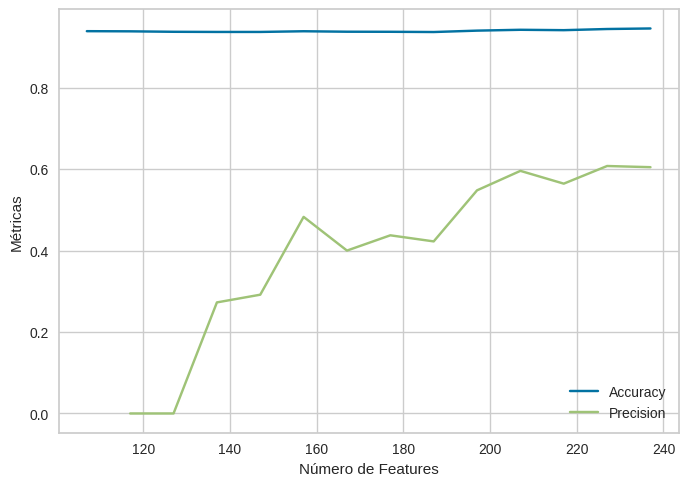

In [56]:
plt.plot(lens, accuracies, label="Accuracy")
plt.plot(lens, precisions, label="Precision")
plt.xlabel("Número de Features")
plt.ylabel("Métricas")
plt.legend()
plt.show()

Se puede identificar en el gráfico obtenido que la eliminación de features conlleva una pérdida significativa de **precision**, logrando un punto interesante de trade-off en las 157, menos que esto entrega valores demasiado bajos de precisión.


In [81]:
selected_features = feature_register[8]
X_train_reduced = model["Preprocessing"].transform(X_train)[selected_features]
model_reduced = model["Modelo"].fit(X_train_reduced, y_train)
X_test_reduced = model["Preprocessing"].transform(X_test)[selected_features]
y_pred_reduced = model_reduced.predict(X_test_reduced)

y_pred = model.fit(X_train,y_train).predict(X_test)

print(f"Clasification report para el modelo original:\n"+ classification_report(y_test, y_pred))
print(f"Clasification report para el modelo reducido:\n"+ classification_report(y_test, y_pred_reduced))

Clasification report para el modelo original:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.60      0.31      0.41       323

    accuracy                           0.95      5277
   macro avg       0.78      0.65      0.69      5277
weighted avg       0.94      0.95      0.94      5277

Clasification report para el modelo reducido:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4954
           1       0.48      0.04      0.08       323

    accuracy                           0.94      5277
   macro avg       0.71      0.52      0.52      5277
weighted avg       0.91      0.94      0.91      5277



- ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
- ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
- Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

  **Respuestas**: La disminución de métricas es significativa. El accuracy se ve poco afectado por el gran desbalance existente en las clases, sin embargo al reducir features la precisión, que es la métrica que más nos interesa, se ve notoriamente debilitada. Más aún, el recall se desploma, que si bien no es nuestra métrica más relevante, si nos significa que del total de jugadores aptos, no estamos comprando prácticamente ninguno. En definitiva no vale la pena reducir el número de featurs en este caso.

  Potencialmente eliminar variables del modelo ayuda a que este se ejecute más rápido, sea más dificil el overfitting, pues hay menos variables que aprender y el ajuste de hiperparámetros es más sencillo.

  En general reducir la dimensionalidad de un modelo nos entrega información relevante acerca de cuales son las variables que nos interesa comprender para caracterizar el problema tratado, pues la característica que estas describen resulta importante para distinguir las clases, en este caso es una cualidad del deportista que resulta importante para saber si es apto o no. Sin embargo en este caso, reducir el número de features de 237 a 157 no supone un gran avance en interpretabilidad.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [22]:
calibrated = CalibratedClassifierCV(model["Modelo"], method='isotonic', cv=3)


In [37]:
proba_sin_calibrar = model.predict_proba(X_test)[:,1]
proba_con_calibrar = (
      calibrated
      .fit(model["Preprocessing"].transform(X_train), y_train)
      .predict_proba(model["Preprocessing"].transform(X_test))
    [:,1]
    )
print("Brier Score Antes de Calibrar: ", brier_score_loss(
    y_test,
    proba_sin_calibrar
))
print("Brier Score Después de Calibrar: ", brier_score_loss(
    y_test,
    proba_con_calibrar
))

Brier Score Antes de Calibrar:  0.04006909333306194
Brier Score Después de Calibrar:  0.036930681077551965


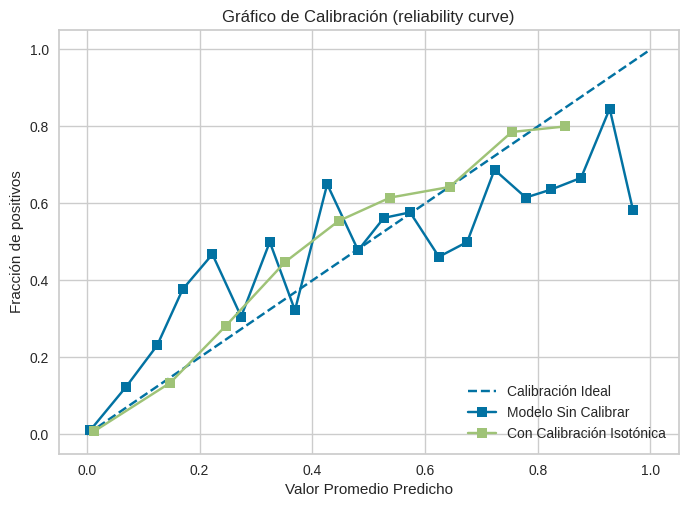

In [38]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Definimos figura para hacer el plot
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Calibración Ideal")
ax.set_ylabel("Fracción de positivos")
ax.set_xlabel("Valor Promedio Predicho")
ax.set_title('Gráfico de Calibración (reliability curve)')

# Graficamos el primer modelo raw
fraction_of_positives_dt, mean_predicted_value_dt = calibration_curve(y_test, proba_sin_calibrar, n_bins=20)
ax.plot(
    mean_predicted_value_dt,
    fraction_of_positives_dt, "s-", label="%s" % ('Modelo Sin Calibrar')
)

# Graficamos el modelo calibrado
prob_pos_cc = (
      calibrated
      .fit(model["Preprocessing"].transform(X_train), y_train)
      .predict_proba(model["Preprocessing"].transform(X_test))
    [:,1]
    )
fraction_of_positives_cc, mean_predicted_value_cc = calibration_curve(y_test, proba_con_calibrar, n_bins=10)
ax.plot(mean_predicted_value_cc, fraction_of_positives_cc, "s-", label="%s" % ('Con Calibración Isotónica'))

ax.legend(loc="lower right")
fig.show()


**Respuesta:** Dado que a mejor Brier Score Loss, menor el error entre la probabilidad predicha y el resultado obtenido, podemos concluir tanto de esta métrica como del gráfico se puede concluir que la calibración ha mejorado el rendimiento del modelo.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>